In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
advertising = pd.DataFrame(pd.read_csv('/content/advertising.csv'))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
advertising.shape

(200, 4)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Removing Null Values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


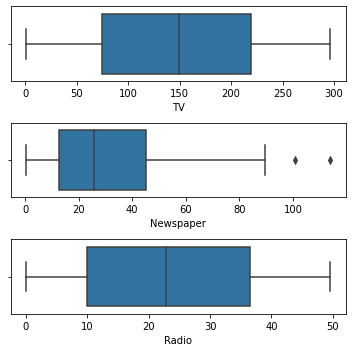

In [ ]:
#outliers Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

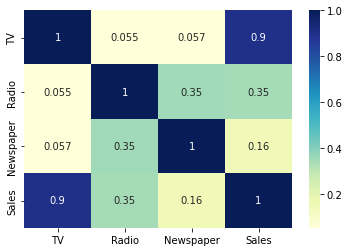

In [ ]:
#Correlation
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
#Defining X and Y
X = advertising['TV']
y = advertising['Sales']

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
import statsmodels.api as sm

In [ ]:

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
#Evaluation
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


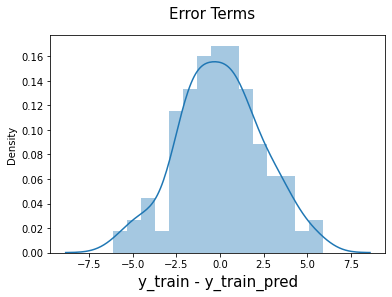

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

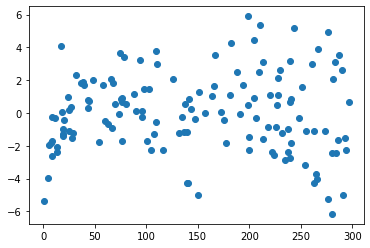

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Test Set
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

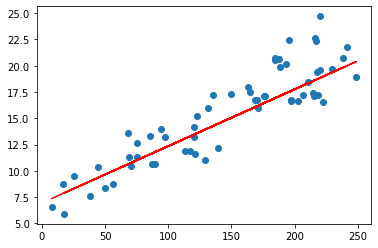

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()